In [6]:
!pip install matplotlib --upgrade

     |████████████████████████████████| 11.2 MB 7.3 MB/s 
     |████████████████████████████████| 900 kB 36.5 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [1]:
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

categories = ['Kebidanan dan Kandungan',
               'Penyakit Dalam',
               'Kesehatan Anak',
               'Kesehatan Kulit dan Kelamin',
               'Kesehatan Gizi',
               'Kesehatan Telinga, Hidung dan Tenggorokan (THT)',
               'Gigi',
               'Kesehatan Mata',
               'Bedah',
               'Kesehatan Jiwa',
               'Ortopedi (Tulang)',
               'Jantung dan Pembuluh Darah',
               'Urologi',
               'Saraf',
               'Pulmonologi (Paru)',
               'Umum' ]
def compare(filename, width=0.25):
    gold_standard = pd.read_csv("gold_standard.csv").set_index("ID").drop("Unnamed: 0", axis=1).sort_index()
    data = pd.read_csv(filename, header=None).set_axis(['ID'] + categories, axis=1).set_index("ID").sort_index()
    
    res = pd.DataFrame(classification_report(gold_standard.to_numpy(), data.to_numpy(), zero_division=0, output_dict=True)).rename(columns=dict(map(lambda x : (str(x[0]), x[1]), enumerate(categories))))
    
    res_no_support = res.drop("support")
    
    labels = res_no_support.columns
    groups = res_no_support.to_numpy()
    
    x = np.arange(len(labels))  # the label locations

    fig, ax = plt.subplots(figsize=(10,10))
    for idx, (group, label) in enumerate(zip(groups, labels)):
        rects = ax.barh(x + (width * (idx - (len(groups)//2))), group, width, label=label)
        ax.bar_label(rects, padding=0)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_yticks(x, labels)
    ax.legend(["Precision", "Recall", "F1-score"])
    plt.xticks(rotation=90) 
    plt.savefig(filename+".png")
    plt.show()
    return res
    

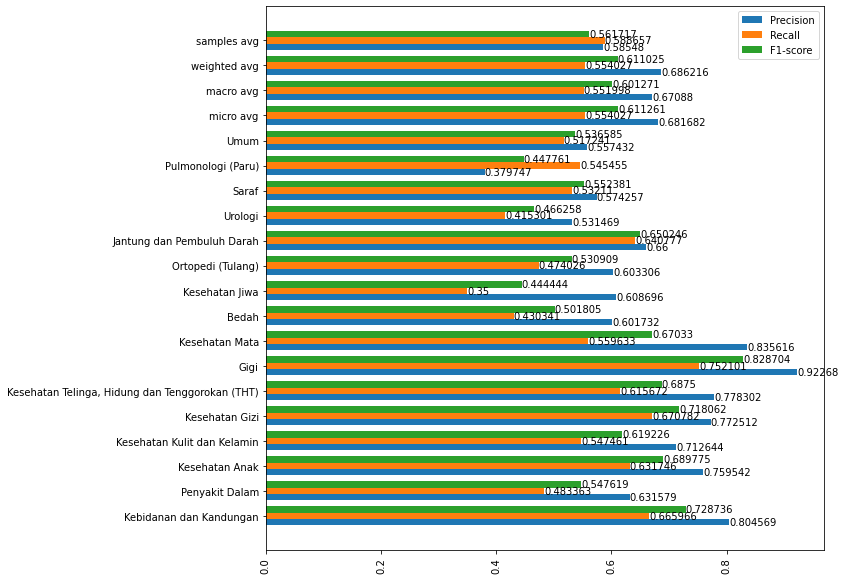

In [2]:
res = compare("results (5).csv")

In [ ]:
res = compare("results_mph_sgdc_min_df_sublineartf_all.csv")

In [ ]:
res = compare("resultlinearsvcparamgridalldatas.csv")